___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Natural Language Processing Project

Welcome to the NLP Project for this section of the course. In this NLP project you will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews. This will be a simpler procedure than the lecture, since we will utilize the pipeline methods for more complex tasks.

We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

Let's get started! Just follow the directions below!

## Imports
 **Import the usual suspects. :) **

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

## The Data

**Read the yelp.csv file and set it as a dataframe called yelp.**

In [2]:
yelp = pd.read_csv("yelp.csv")

** Check the head, info , and describe methods on yelp.**

In [3]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [5]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


**Create a new column called "text length" which is the number of words in the text column.**

In [6]:
yelp['text']

0       My wife took me here on my birthday for breakf...
1       I have no idea why some people give bad review...
2       love the gyro plate. Rice is so good and I als...
3       Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4       General Manager Scott Petello is a good egg!!!...
                              ...                        
9995    First visit...Had lunch here today - used my G...
9996    Should be called house of deliciousness!\n\nI ...
9997    I recently visited Olive and Ivy for business ...
9998    My nephew just moved to Scottsdale recently so...
9999    4-5 locations.. all 4.5 star average.. I think...
Name: text, Length: 10000, dtype: object

In [7]:
for item in yelp['text']:
    l = item.split()
    p = 0
    for i in l:
        p+=1
    print(p)

155
257
16
76
86
366
292
50
62
34
50
59
87
105
237
129
274
77
222
126
113
21
28
119
49
200
174
103
194
37
136
67
322
65
116
217
199
26
53
81
114
114
17
23
118
41
35
93
27
706
310
35
143
132
205
896
383
78
50
130
90
106
147
127
95
60
50
49
18
80
84
159
118
279
199
53
208
52
58
29
372
171
423
87
485
46
228
113
57
111
76
63
83
64
68
7
50
14
92
272
125
10
105
269
26
168
92
88
47
227
56
111
200
282
47
245
96
55
28
114
51
191
48
297
74
69
214
5
92
189
109
167
10
82
101
7
38
272
130
11
47
210
175
60
175
15
250
94
36
41
118
141
281
50
172
194
70
73
22
55
130
221
27
323
124
6
39
76
65
218
146
25
25
106
221
9
35
105
144
51
195
63
228
188
33
82
86
126
165
41
73
32
150
357
53
55
274
162
287
57
14
31
130
351
36
164
49
78
70
72
65
131
152
57
45
9
294
2
162
93
199
58
114
257
105
97
270
77
141
30
342
130
38
37
89
214
412
91
129
123
16
110
34
102
48
37
140
39
132
72
104
288
127
9
9
286
101
205
39
123
24
153
137
9
41
78
9
81
117
71
36
197
72
246
257
604
58
67
45
117
36
191
126
182
2
20
98
165
120
393
75

55
193
113
177
316
129
64
97
123
46
182
114
404
46
142
113
44
19
89
71
160
264
68
132
167
423
404
170
34
67
497
35
256
71
125
25
291
91
419
53
99
38
84
87
26
201
195
164
34
68
19
150
141
23
247
16
203
41
219
82
185
45
384
105
78
30
102
41
87
51
55
28
205
39
187
206
67
79
171
245
51
107
152
36
89
75
119
119
26
247
133
118
143
98
142
246
46
57
90
24
156
189
74
44
75
108
256
70
94
211
190
304
116
57
65
170
61
5
33
26
190
166
57
34
11
103
52
126
60
85
93
103
43
276
98
308
57
155
4
44
58
90
54
48
84
101
262
118
74
105
249
208
63
163
255
56
108
343
78
19
228
54
63
221
324
164
113
253
21
412
106
98
125
356
242
73
45
219
107
38
55
91
158
79
124
179
188
300
167
68
17
123
225
53
191
124
494
73
74
130
153
197
93
118
67
122
35
83
99
52
89
102
82
241
147
160
66
79
71
124
47
19
150
182
119
49
41
235
37
47
123
17
53
223
45
52
142
55
79
152
243
451
7
62
29
197
195
189
26
333
181
85
157
236
429
94
101
37
215
20
98
108
28
20
172
66
275
171
91
153
162
94
271
210
82
105
178
403
172
36
111
286
187
252
87
3

191
169
118
142
168
30
30
93
36
110
124
76
159
256
29
143
52
257
210
29
156
200
129
115
113
28
116
123
142
113
70
156
105
70
69
90
144
38
310
93
103
71
177
171
321
137
87
52
71
117
200
14
98
59
15
93
196
36
284
334
179
41
98
178
125
26
89
52
103
22
32
69
159
5
55
348
55
180
151
139
10
101
244
105
447
113
54
31
120
31
127
59
217
32
328
25
104
251
12
198
231
8
105
74
85
196
168
20
24
123
42
121
213
128
56
169
92
178
42
33
99
60
163
168
24
12
80
46
171
364
153
331
197
62
331
127
167
143
133
70
35
160
56
40
135
77
85
34
445
9
103
507
421
247
329
93
117
76
39
170
15
10
254
207
552
116
187
52
135
15
175
101
38
245
82
904
55
17
186
44
154
5
23
112
100
140
103
53
65
355
98
147
199
62
147
132
52
51
81
19
141
34
128
370
58
62
21
25
264
317
202
90
130
152
179
230
356
98
126
258
108
149
348
185
83
80
71
38
74
235
63
120
47
71
405
15
16
151
84
231
192
88
806
45
49
79
24
137
49
52
40
59
125
113
104
144
448
53
14
42
128
210
137
113
133
188
566
53
43
62
56
292
211
97
234
22
113
220
205
79
77
60
34
215

137
20
163
86
37
190
68
204
108
123
63
130
545
150
192
35
123
37
175
42
4
109
246
206
24
167
178
88
88
154
110
22
35
269
396
119
119
159
86
84
144
104
341
32
125
354
81
5
64
67
245
57
268
147
3
107
404
31
43
39
49
83
71
218
88
73
265
79
104
14
51
132
175
126
87
23
63
266
217
33
75
118
174
138
39
140
46
66
367
32
115
45
246
26
46
149
852
47
31
100
15
26
92
50
88
371
114
107
179
87
124
322
329
48
39
152
54
158
172
43
199
111
81
26
178
148
133
103
64
102
287
26
55
263
114
111
72
135
139
100
64
538
57
181
75
164
59
46
17
214
331
61
86
82
100
110
24
42
67
363
59
92
355
69
122
238
4
216
84
260
109
85
314
105
131
108
510
123
42
249
214
221
107
57
49
218
84
121
62
200
95
62
58
542
72
25
215
233
4
29
25
171
169
118
159
40
304
159
58
190
61
68
199
13
153
97
20
113
77
22
116
46
62
225
67
55
18
106
121
34
6
98
57
101
82
46
43
118
22
99
91
166
50
19
57
70
372
83
246
80
182
150
233
72
186
29
217
122
234
131
317
4
81
115
259
218
65
11
53
121
6
62
61
107
50
250
274
165
147
99
81
19
96
159
84
158
86
24

In [8]:
def words(mess):
    l = mess.split()
    p = 0
    for i in l:
        p+=1
    return p

In [9]:
yelp['text length'] = yelp['text'].apply(words)

In [10]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,155
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,257
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,16
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,76
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,86


# EDA

Let's explore the data

## Imports

**Import the data visualization libraries if you haven't done so already.**

**Use FacetGrid from the seaborn library to create a grid of 5 histograms of text length based off of the star ratings. Reference the seaborn documentation for hints on this**

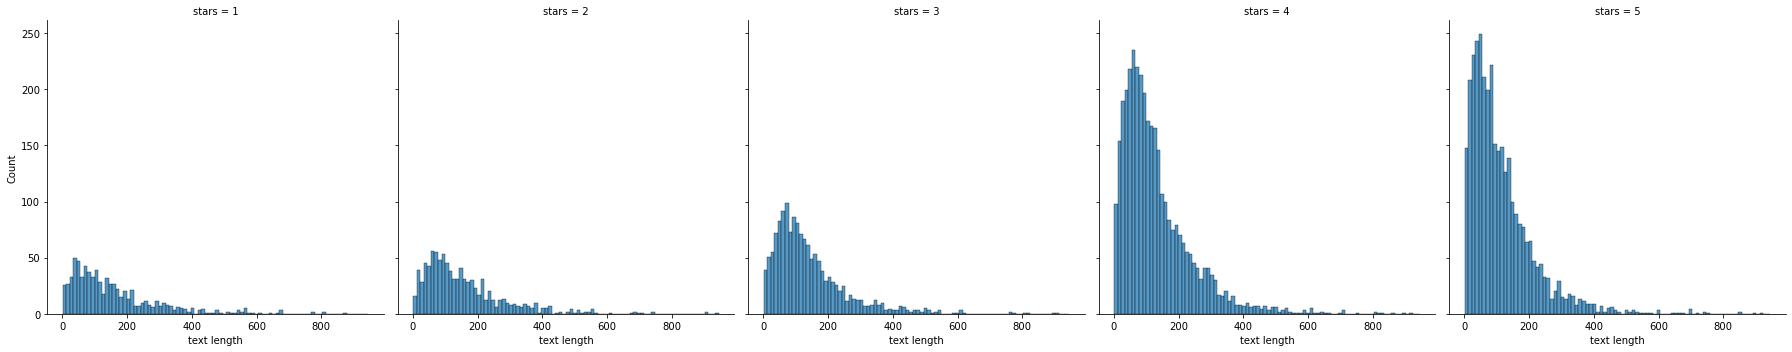

In [11]:
sns.displot(x='text length',data=yelp,col='stars')

**Create a boxplot of text length for each star category.**

<AxesSubplot:xlabel='stars', ylabel='text length'>

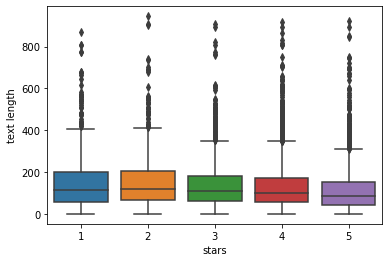

In [12]:
sns.boxplot(x='stars',y='text length',data=yelp)

**Create a countplot of the number of occurrences for each type of star rating.**

<AxesSubplot:xlabel='stars', ylabel='count'>

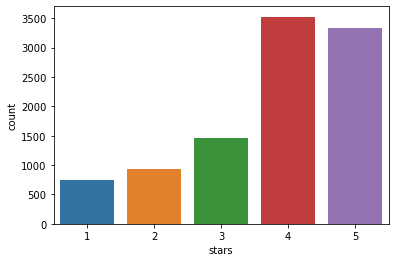

In [13]:
sns.countplot(x='stars',data=yelp)

** Use groupby to get the mean values of the numerical columns, you should be able to create this dataframe with the operation:**

In [14]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,155
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,257
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,16
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,76
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,86


In [15]:
yelp.groupby('stars').mean()

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,153.953271
2,0.719525,1.563107,0.875944,156.435814
3,0.788501,1.306639,0.694730,140.714579
4,0.954623,1.395916,0.670448,131.174135
5,0.944261,1.381780,0.608631,114.463590


**Use the corr() method on that groupby dataframe to produce this dataframe:**

In [16]:
yelp.groupby('stars').mean().corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.865362
useful,-0.743329,1.000000,0.894506,0.697506
funny,-0.944939,0.894506,1.000000,0.847204
text length,-0.865362,0.697506,0.847204,1.000000


**Then use seaborn to create a heatmap based off that .corr() dataframe:**

<AxesSubplot:>

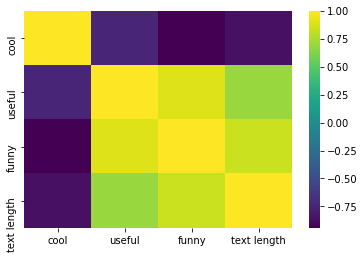

In [17]:
sns.heatmap(yelp.groupby('stars').mean().corr(),cmap='viridis')

## NLP Classification Task

Let's move on to the actual task. To make things a little easier, go ahead and only grab reviews that were either 1 star or 5 stars.

**Create a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.**

In [18]:
yelp_class = pd.DataFrame.append(self=yelp[yelp['stars'] == 1],other = yelp[yelp['stars'] == 5])

In [19]:
yelp_class

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
23,IJ0o6b8bJFAbG6MjGfBebQ,2010-09-05,Dx9sfFU6Zn0GYOckijom-g,1,U can go there n check the car out. If u wanna...,review,zRlQEDYd_HKp0VS3hnAffA,0,1,1,119
31,vvA3fbps4F9nGlAEYKk_sA,2012-05-04,S9OVpXat8k5YwWCn6FAgXg,1,Disgusting! Had a Groupon so my daughter and ...,review,8AMn6644NmBf96xGO3w6OA,0,1,0,67
35,o1GIYYZJjM6nM03fQs_uEQ,2011-11-30,ApKbwpYJdnhhgP4NbjQw2Q,1,"I've eaten here many times, but none as bad as...",review,iwUN95LIaEr75TZE_JC6bg,0,4,3,217
61,l4vBbCL9QbGiwLuLKwD_bA,2011-11-22,DJVxOfj2Rw9zklC9tU3i1w,1,I have always been a fan of Burlington's deals...,review,EPROVap0M19Y6_4uf3eCmQ,0,0,0,106
64,CEswyP-9SsXRNLR9fFGKKw,2012-05-19,GXj4PNAi095-q9ynPYH3kg,1,Another night meeting friends here. I have to...,review,MjLAe48XNfYlTeFYca5gMw,0,1,2,95
...,...,...,...,...,...,...,...,...,...,...,...
9990,R8VwdLyvsp9iybNqRvm94g,2011-10-03,pcEeHdAJPoFNF23es0kKWg,5,Yes I do rock the hipster joints. I dig this ...,review,b92Y3tyWTQQZ5FLifex62Q,1,1,1,56
9991,WJ5mq4EiWYAA4Vif0xDfdg,2011-12-05,EuHX-39FR7tyyG1ElvN1Jw,5,Only 4 stars? \n\n(A few notes: The folks that...,review,hTau-iNZFwoNsPCaiIUTEA,1,1,0,170
9992,f96lWMIAUhYIYy9gOktivQ,2009-03-10,YF17z7HWlMj6aezZc-pVEw,5,I'm not normally one to jump at reviewing a ch...,review,W_QXYA7A0IhMrvbckz7eVg,2,3,2,244
9994,L3BSpFvxcNf3T_teitgt6A,2012-03-19,0nxb1gIGFgk3WbC5zwhKZg,5,Let's see...what is there NOT to like about Su...,review,OzOZv-Knlw3oz9K5Kh5S6A,1,2,1,357


** Create two objects X and y. X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class. (Your features and target/labels)**

In [20]:
X = yelp_class['text']
y = yelp_class['stars']

**Import CountVectorizer and create a CountVectorizer object.**

In [21]:
from sklearn.feature_extraction.text import CountVectorizer


In [22]:
vect = CountVectorizer()

** Use the fit_transform method on the CountVectorizer object and pass in X (the 'text' column). Save this result by overwriting X.**

In [23]:
X = vect.fit_transform(X)

## Train Test Split

Let's split our data into training and testing data.

** Use train_test_split to split up the data into X_train, X_test, y_train, y_test. Use test_size=0.3 and random_state=101 **

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training a Model

Time to train a model!

** Import MultinomialNB and create an instance of the estimator and call is nb **

In [26]:
from sklearn.naive_bayes import MultinomialNB

In [29]:
nb = MultinomialNB()

**Now fit nb using the training data.**

In [30]:
nb.fit(X_train,y_train)

MultinomialNB()

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Predictions and Evaluations

Time to see how our model did!

**Use the predict method off of nb to predict labels from X_test.**

In [32]:
pred = nb.predict(X_test)

** Create a confusion matrix and classification report using these predictions and y_test **

In [33]:
from sklearn.metrics import classification_report,confusion_matrix

In [34]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           1       0.91      0.69      0.79       229
           5       0.93      0.98      0.96       997

    accuracy                           0.93      1226
   macro avg       0.92      0.84      0.87      1226
weighted avg       0.93      0.93      0.93      1226

[[159  70]
 [ 16 981]]


[[159  69]
 [ 22 976]]


             precision    recall  f1-score   support

          1       0.88      0.70      0.78       228
          5       0.93      0.98      0.96       998

avg / total       0.92      0.93      0.92      1226



**Great! Let's see what happens if we try to include TF-IDF to this process using a pipeline.**

# Using Text Processing

** Import TfidfTransformer from sklearn. **

In [35]:
from sklearn.feature_extraction.text import TfidfTransformer

** Import Pipeline from sklearn. **

In [36]:
from sklearn.pipeline import Pipeline

** Now create a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()**

In [37]:
pipe = Pipeline([('bow',CountVectorizer()),('tfidf',TfidfTransformer()),('bae',MultinomialNB())])

## Using the Pipeline

**Time to use the pipeline! Remember this pipeline has all your pre-process steps in it already, meaning we'll need to re-split the original data (Remember that we overwrote X as the CountVectorized version. What we need is just the text**

### Train Test Split

**Redo the train test split on the yelp_class object.**

In [38]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Now fit the pipeline to the training data. Remember you can't use the same training data as last time because that data has already been vectorized. We need to pass in just the text and labels**

In [39]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('bae', MultinomialNB())])

Pipeline(steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

### Predictions and Evaluation

** Now use the pipeline to predict from the X_test and create a classification report and confusion matrix. You should notice strange results.**

In [41]:
predpipe = pipe.predict(X_test)

In [42]:
print(classification_report(y_test,predpipe))
print(confusion_matrix(y_test,predpipe))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       229
           5       0.81      1.00      0.90       997

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226

[[  0 229]
 [  0 997]]


C:\Dev\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Dev\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Dev\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[  0 228]
 [  0 998]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00       228
          5       0.81      1.00      0.90       998

avg / total       0.66      0.81      0.73      1226



/Users/marci/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Looks like Tf-Idf actually made things worse! That is it for this project. But there is still a lot more you can play with:

**Some other things to try....**
Try going back and playing around with the pipeline steps and seeing if creating a custom analyzer like we did in the lecture helps (note: it probably won't). Or recreate the pipeline with just the CountVectorizer() and NaiveBayes. Does changing the ML model at the end to another classifier help at all?

# Great Job!